In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
from scipy.spatial import distance
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set(color_codes=True)

In [31]:
data = np.genfromtxt('data/data-logistic.csv', delimiter=",")

In [32]:
y = data[:,0]
X = data[:,1:]

In [33]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [34]:
w0 = [1,2,3]
w = np.array(w0)[:]
w0[0] = 6
w

array([1, 2, 3])

In [35]:
def gradient_step(X,y,w,k=0.1,C=0):
    # fill answer with zeroes [0,0]
    out = np.array([0.0,0.0])
    l = len(y)
    # iterate through X,y
    for idx in range(0, l):
        x_cur = X[idx]
        y_cur = y[idx]
        w1 = y_cur * x_cur[0] * (1.0 - 1.0 / (1 + math.exp(-y_cur * np.dot(x_cur, w))))
        w2 = y_cur * x_cur[1] * (1.0 - 1.0 / (1 + math.exp(-y_cur * np.dot(x_cur, w))))
        out[0] += w1
        out[1] += w2
    
    out *= k / l
    out += w - k * C * w
    return out
    

In [36]:
def gd(X, y, k=0.1, w0=None, C=0, eps=1e-5, iteration_limit=10000):
    # if w0 is zero, fill it with zeroes
    if w0 == None:
        w0 = np.array([0.0,0.0])
    w = np.array(w0)[:] #copy w0
    
    for i in range(0, iteration_limit):
        new_w = gradient_step(X,y,w,k,C)
        diff = distance.euclidean(w, new_w)
        w = new_w
        if diff < eps:
            print("break on iteration ", i)
            break
    
    return w
    
    

In [75]:
w = gd(X,y)
w_L2 = gd(X,y,C=10)
w_w0 = gd(X,y,w0=np.array([0.0,3.0]))

break on iteration  243
break on iteration  7
break on iteration  378


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


In [39]:
def proba(X, w):
    l = len(X)
    p = np.zeros(l)
    for idx in range(0, l):
        x = X[idx]
        p[idx] = (1.0 / (1 + math.exp(-1 * np.dot(x, w))))
    return p

In [78]:
p = proba(X, w)
p_L2 = proba(X, w_L2)
p_w0 = proba(X, w_w0)

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
roc = roc_auc_score(y, p)
roc_L2 = roc_auc_score(y, p_L2)
roc_w0 = roc_auc_score(y, p_w0)

In [81]:
roc_L2

0.93628571428571417

In [82]:
roc

0.92685714285714282

In [83]:
roc_w0

0.92685714285714282

In [55]:
res = str(round(roc, 3)) + " " + str(round(roc_L2, 3))
print(res)
w

0.927 0.936


array([ 0.28781162,  0.0919833 ])

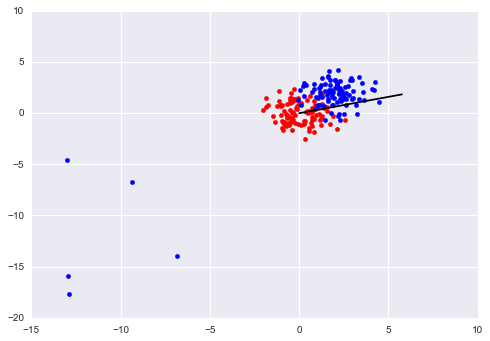

In [85]:
plt.plot([0,w[0]*20],[0, w[1]*20], color='black')
plt.scatter(X[y == -1][:,0], X[y == -1][:,1], color='red')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], color='blue')


In [89]:
p[:5]

array([ 0.44922586,  0.69020649,  0.42798423,  0.6983426 ,  0.61440485])